# TensorFlow
 It is an open source artificial intelligence library, using data flow graphs to build models. It allows developers to create large-scale neural networks with many layers. TensorFlow is mainly used for: Classification, Perception, Understanding, Discovering, Prediction and Creation.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

## Gather our Data

In [2]:
train_data = pd.read_csv("boston_train.csv")

test_data = pd.read_csv("boston_test.csv")

predict_data = pd.read_csv("boston_predict.csv")

### Take a look at our data.

In [3]:
train_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6


In [4]:
train_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
       'MEDV'],
      dtype='object')

### Define features and labels in our data

In [5]:
FEATURES=['CRIM','ZN','INDUS', 'NOX','RM', 'AGE','DIS','TAX','PTRATIO','MEDV']
LABEL="MEDV"

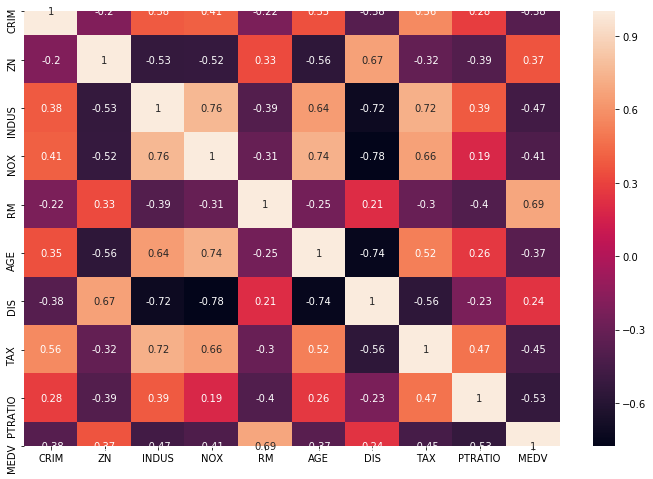

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True) # visualize using a heatmap

In [7]:
X_train = train_data[['CRIM','ZN','INDUS', 'NOX','RM','AGE','TAX','PTRATIO']]
Y_train = train_data['MEDV']

### Preprocessing

Scikit Learn is a library available to develop machine learning models and test.

In [8]:
from sklearn.preprocessing import normalize, scale


Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [9]:
X_scale = scale(X_train)
X_norm = normalize(X_scale)

In [10]:
X_scale

array([[-0.17155637, -0.483311  ,  1.17133443, ...,  0.94740297,
        -0.05047626, -1.7587732 ],
       [ 1.01070306, -0.483311  ,  0.95997891, ...,  0.89825289,
         1.48379204,  0.79101332],
       [-0.40384768, -0.483311  , -0.63804019, ..., -2.32458832,
        -1.04220862, -0.27526104],
       ...,
       [-0.26909379, -0.483311  , -0.46238661, ...,  0.45239141,
        -0.61051336,  1.16189135],
       [ 0.37007931, -0.483311  ,  0.95997891, ...,  0.31547332,
         1.48379204,  0.79101332],
       [-0.40234465, -0.483311  , -0.63804019, ..., -2.19469167,
        -1.04220862, -0.27526104]])

## Build and Train

##### The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.
##### ‘Dense’ is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.
##### We have 64 nodes in first input layer and 32 in 2nd and then 1 in last layer(last layer is output so we only need 1). This number can also be in the hundreds or thousands. Increasing the number of nodes in each layer increases model capacity.
##### ‘Activation’ is the activation function for the layer. An activation function allows models to take into account nonlinear relationships. For example, if you are predicting diabetes in patients, going from age 10 to 11 is different than going from age 60–61.
##### The activation function we will be using is ReLU or Rectified Linear Activation. Although it is two linear pieces, it has been proven to work well in neural networks.
##### The first layer needs an input shape. The input shape specifies the number of rows and columns in the input. The number of columns in our input is stored in ‘X_train.keys()’. There is nothing after the comma which indicates that there can be any amount of rows.

In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,
                    input_shape=[len(X_train.keys())]),
        layers.Dense(32,activation=tf.nn.relu),
        layers.Dense(1)
    ]) 
    
    optimizer = tf.keras.optimizers.RMSprop(0.001) 
    
    model.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error',
                     'mean_squared_error'])
    return model



##### The optimizer controls the learning rate. We will be using ‘RMSprop’ as our optmizer. RMSprop is generally a good optimizer to use for many cases. The RMSprop optimizer adjusts the learning rate throughout training.
##### For our loss function, we will use ‘mean_squared_error’. It is calculated by taking the average squared difference between the predicted and actual values. It is a popular loss function for regression problems. The closer to 0 this is, the better the model performed.

### Build

In [12]:
model= build_model() #call build_model to create model and save it in model
model.summary() #if model has been created successfully we should see the summary

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


##### To train, we will use the ‘fit()’ function on our model with the following five parameters: training data (train_X), target data (train_y), validation split, the number of epochs and callbacks.
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches.

In [13]:
EPOCHS=50
history = model.fit(X_norm,Y_train,
                   epochs=EPOCHS,validation_split=0.2,
                    verbose=0
                   )

## Testing the Model

In [14]:
X_test = test_data[['CRIM','ZN','INDUS', 'NOX','RM','AGE','TAX','PTRATIO']]
Y_test = test_data['MEDV']

### scale and normalise our testing data too

In [15]:
X_scale_test = scale(X_test)
X_norm_test = normalize(X_scale_test)

## Prediction
If you want to use this model to make predictions on new data, we would use the ‘predict()’ function, passing in our new data.

In [16]:
yhat = model.predict(X_norm_test)

### To see how did our model performed lets find accuracy for it

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
MSE = mean_squared_error(Y_test,yhat)
print(MSE)

16.933348985143535


### r2 score
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. ... 100% indicates that the model explains all the variability of the response data around its mean.

In [19]:
r2_score(Y_test,yhat)

0.6985070954305432